# Week 6

## Combining dataframes

In [1]:
import pandas as pd
import numpy as np

rng = np.random.default_rng(10)

names = ["Ava", "Benjamin", "Charlotte", "Daniel", "Emma", "Fredric", "Gianna"]
courses = ["MTH 141", "MTH 142", "MTH 241", "MTH 306", "MTH 309", "MTH 311"]
rooms = ["NSC 216", "Capen 110", "Park 440"]

# concat rows data
scores1 = rng.integers(0, 100, 12).reshape(4, 3)
scores2 = rng.integers(0, 100, 9).reshape(3, 3)
columns = ["problem_1", "problem_2", "problem_3"]
sec1 = pd.DataFrame(scores1, index=names[:4], columns=columns)
sec2 = pd.DataFrame(scores2, index=names[4:7], columns=columns)

# concat columns data
scores1 = rng.integers(0, 100, 8).reshape(4, 2)
scores2 = rng.integers(0, 100, 9).reshape(3, 3)
part1 = pd.DataFrame(scores1,
                     index=names[:4],
                     columns=["problem_1", "problem_2"])
part2 = pd.DataFrame(scores2,
                     index=names[:3],
                     columns=["problem_3", "problem_4", "problem_5"])

# merging data
office_nums = rng.integers(100, 150, len(names[:-1]))
courses = pd.DataFrame({"course": courses,
                        "instructor": rng.choice(names[1:], len(courses))})
instructors = pd.DataFrame({"name": names[:-1], "office": office_nums}, dtype="object")

### Concatenate along rows

In [2]:
display(sec1)
display(sec2)

problem_1  problem_2  problem_3
Ava               77         95         26
Benjamin          20         79         82
Charlotte         51         14         83
Daniel            51         15         13

problem_1  problem_2  problem_3
Emma            41         68         40
Fredric         84          0         42
Gianna          52         95         23

In [3]:
pd.concat([sec1, sec2])

problem_1  problem_2  problem_3
Ava               77         95         26
Benjamin          20         79         82
Charlotte         51         14         83
Daniel            51         15         13
Emma              41         68         40
Fredric           84          0         42
Gianna            52         95         23

In [4]:
df = pd.concat([sec1, sec2], keys=["section_1", "section_2"])
df

problem_1  problem_2  problem_3
section_1 Ava               77         95         26
          Benjamin          20         79         82
          Charlotte         51         14         83
          Daniel            51         15         13
section_2 Emma              41         68         40
          Fredric           84          0         42
          Gianna            52         95         23

In [5]:
df.index

MultiIndex([('section_1',       'Ava'),
            ('section_1',  'Benjamin'),
            ('section_1', 'Charlotte'),
            ('section_1',    'Daniel'),
            ('section_2',      'Emma'),
            ('section_2',   'Fredric'),
            ('section_2',    'Gianna')],
           )

In [6]:
df.loc[('section_1', 'Ava')]

problem_1    77
problem_2    95
problem_3    26
Name: (section_1, Ava), dtype: int64

In [7]:
df.loc['section_1']

problem_1  problem_2  problem_3
Ava               77         95         26
Benjamin          20         79         82
Charlotte         51         14         83
Daniel            51         15         13

In [8]:
sec1 = sec1.rename({'problem_3': 'problem_3a'}, axis=1)
sec1

problem_1  problem_2  problem_3a
Ava               77         95          26
Benjamin          20         79          82
Charlotte         51         14          83
Daniel            51         15          13

In [9]:
sec2 = sec2.rename({'problem_3': 'problem_3b'}, axis=1)
sec2

problem_1  problem_2  problem_3b
Emma            41         68          40
Fredric         84          0          42
Gianna          52         95          23

In [10]:
pd.concat([sec1, sec2])

problem_1  problem_2  problem_3a  problem_3b
Ava               77         95        26.0         NaN
Benjamin          20         79        82.0         NaN
Charlotte         51         14        83.0         NaN
Daniel            51         15        13.0         NaN
Emma              41         68         NaN        40.0
Fredric           84          0         NaN        42.0
Gianna            52         95         NaN        23.0

In [11]:
pd.concat([sec1, sec2], join='inner')

problem_1  problem_2
Ava               77         95
Benjamin          20         79
Charlotte         51         14
Daniel            51         15
Emma              41         68
Fredric           84          0
Gianna            52         95

### Concatenating along columns

In [12]:
display(part1)
display(part2)

problem_1  problem_2
Ava               82          7
Benjamin          33         74
Charlotte         57         93
Daniel            75         91

problem_3  problem_4  problem_5
Ava               82         13         93
Benjamin          84         14         97
Charlotte         74         31         13

In [13]:
pd.concat([part1, part2], axis=1)

problem_1  problem_2  problem_3  problem_4  problem_5
Ava               82          7       82.0       13.0       93.0
Benjamin          33         74       84.0       14.0       97.0
Charlotte         57         93       74.0       31.0       13.0
Daniel            75         91        NaN        NaN        NaN

### Merging

In [14]:
display(courses)
display(instructors)

course instructor
0  MTH 141       Emma
1  MTH 142  Charlotte
2  MTH 241   Benjamin
3  MTH 306     Gianna
4  MTH 309  Charlotte
5  MTH 311       Emma

name office
0        Ava    119
1   Benjamin    145
2  Charlotte    139
3     Daniel    111
4       Emma    124
5    Fredric    142

In [15]:
schedule = pd.merge(courses, 
                    instructors, 
                    left_on='instructor', 
                    right_on='name',
                    how='inner'
                   )
schedule

course instructor       name office
0  MTH 141       Emma       Emma    124
1  MTH 311       Emma       Emma    124
2  MTH 142  Charlotte  Charlotte    139
3  MTH 309  Charlotte  Charlotte    139
4  MTH 241   Benjamin   Benjamin    145

In [16]:
schedule.drop("name", axis=1)

course instructor office
0  MTH 141       Emma    124
1  MTH 311       Emma    124
2  MTH 142  Charlotte    139
3  MTH 309  Charlotte    139
4  MTH 241   Benjamin    145

In [17]:
schedule2 = pd.merge(courses, 
                    instructors, 
                    left_on='instructor', 
                    right_on='name',
                    how='left'
                   )
schedule2

course instructor       name office
0  MTH 141       Emma       Emma    124
1  MTH 142  Charlotte  Charlotte    139
2  MTH 241   Benjamin   Benjamin    145
3  MTH 306     Gianna        NaN    NaN
4  MTH 309  Charlotte  Charlotte    139
5  MTH 311       Emma       Emma    124

In [18]:
schedule3 = pd.merge(courses, 
                    instructors, 
                    left_on='instructor', 
                    right_on='name',
                    how='right'
                   )
schedule3

course instructor       name office
0      NaN        NaN        Ava    119
1  MTH 241   Benjamin   Benjamin    145
2  MTH 142  Charlotte  Charlotte    139
3  MTH 309  Charlotte  Charlotte    139
4      NaN        NaN     Daniel    111
5  MTH 141       Emma       Emma    124
6  MTH 311       Emma       Emma    124
7      NaN        NaN    Fredric    142

In [19]:
schedule4 = pd.merge(courses, 
                    instructors, 
                    left_on='instructor', 
                    right_on='name',
                    how='outer'
                   )
schedule4

course instructor       name office
0  MTH 141       Emma       Emma    124
1  MTH 311       Emma       Emma    124
2  MTH 142  Charlotte  Charlotte    139
3  MTH 309  Charlotte  Charlotte    139
4  MTH 241   Benjamin   Benjamin    145
5  MTH 306     Gianna        NaN    NaN
6      NaN        NaN        Ava    119
7      NaN        NaN     Daniel    111
8      NaN        NaN    Fredric    142

## Baby names project

In [20]:
pwd

'/Users/bb/Documents/GitHub/MTH548/preps/week_6'

In [21]:
ls

baby_names/             names.zip               week_6_prep.ipynb
baby_names.csv          namesbystate.zip        week_6_prep_2020.ipynb
my_plot.html            week_6.ipynb


In [22]:
from zipfile import ZipFile

In [23]:
with ZipFile("names.zip", 'r') as z:
    z.extractall(path='baby_names')

In [26]:
df = pd.read_csv("baby_names/yob1880.txt", names=["name", "sex", "count"])
df

name sex  count
0          Mary   F   7065
1          Anna   F   2604
2          Emma   F   2003
3     Elizabeth   F   1939
4        Minnie   F   1746
...         ...  ..    ...
1995     Woodie   M      5
1996     Worthy   M      5
1997     Wright   M      5
1998       York   M      5
1999  Zachariah   M      5

[2000 rows x 3 columns]

In [27]:
import glob

file_names = glob.glob("baby_names/yob*.txt")
file_names

['baby_names/yob2000.txt',
 'baby_names/yob2014.txt',
 'baby_names/yob1938.txt',
 'baby_names/yob1910.txt',
 'baby_names/yob1904.txt',
 'baby_names/yob1905.txt',
 'baby_names/yob1911.txt',
 'baby_names/yob1939.txt',
 'baby_names/yob2015.txt',
 'baby_names/yob2001.txt',
 'baby_names/yob2017.txt',
 'baby_names/yob2003.txt',
 'baby_names/yob1907.txt',
 'baby_names/yob1913.txt',
 'baby_names/yob1898.txt',
 'baby_names/yob1899.txt',
 'baby_names/yob1912.txt',
 'baby_names/yob1906.txt',
 'baby_names/yob2002.txt',
 'baby_names/yob2016.txt',
 'baby_names/yob2012.txt',
 'baby_names/yob2006.txt',
 'baby_names/yob1902.txt',
 'baby_names/yob1916.txt',
 'baby_names/yob1889.txt',
 'baby_names/yob1888.txt',
 'baby_names/yob1917.txt',
 'baby_names/yob1903.txt',
 'baby_names/yob2007.txt',
 'baby_names/yob2013.txt',
 'baby_names/yob2005.txt',
 'baby_names/yob2011.txt',
 'baby_names/yob1915.txt',
 'baby_names/yob1901.txt',
 'baby_names/yob1929.txt',
 'baby_names/yob1928.txt',
 'baby_names/yob1900.txt',
 

In [28]:
frames = [pd.read_csv(f, names=["name", "sex", "count"]) for f in file_names]

In [29]:
frames[100]

name sex  count
0       Isabella   F  22311
1           Emma   F  17905
2         Olivia   F  17438
3         Sophia   F  16948
4            Ava   F  15873
...          ...  ..    ...
34710  Zyquarius   M      5
34711      Zyran   M      5
34712    Zyreion   M      5
34713     Zyrian   M      5
34714     Zyvion   M      5

[34715 rows x 3 columns]

In [30]:
df = pd.concat(frames)
df

name sex  count
0        Emily   F  25957
1       Hannah   F  23084
2      Madison   F  19968
3       Ashley   F  17997
4        Sarah   F  17706
...        ...  ..    ...
32025   Zyheem   M      5
32026    Zykel   M      5
32027   Zyking   M      5
32028      Zyn   M      5
32029    Zyran   M      5

[2020863 rows x 3 columns]

In [31]:
df[df['name'] == 'Emily']

name sex  count
0      Emily   F  25957
20595  Emily   M     30
6      Emily   F  12652
26398  Emily   M     11
163    Emily   F   1308
...      ...  ..    ...
120    Emily   F   2184
9881   Emily   M      6
172    Emily   F   1094
11     Emily   F   8229
27045  Emily   M      8

[218 rows x 3 columns]

In [33]:
f = file_names[0]
f

'baby_names/yob2000.txt'

In [34]:
"hello.there".split('.')[0]

'hello'

In [37]:
int(f.split('.')[0][-4:])

2000

In [38]:
years = [int(f.split('.')[0][-4:]) for f in file_names]
years

[2000,
 2014,
 1938,
 1910,
 1904,
 1905,
 1911,
 1939,
 2015,
 2001,
 2017,
 2003,
 1907,
 1913,
 1898,
 1899,
 1912,
 1906,
 2002,
 2016,
 2012,
 2006,
 1902,
 1916,
 1889,
 1888,
 1917,
 1903,
 2007,
 2013,
 2005,
 2011,
 1915,
 1901,
 1929,
 1928,
 1900,
 1914,
 2010,
 2004,
 1973,
 1967,
 1998,
 1999,
 1966,
 1972,
 1958,
 1964,
 1970,
 1971,
 1965,
 1959,
 1961,
 1975,
 1949,
 1948,
 1974,
 1960,
 1976,
 1962,
 1989,
 1988,
 1963,
 1977,
 1952,
 1946,
 1991,
 1985,
 1984,
 1990,
 1947,
 1953,
 1979,
 1945,
 1951,
 1986,
 1992,
 1993,
 1987,
 1950,
 1944,
 1978,
 1940,
 1954,
 1968,
 1983,
 1997,
 1996,
 1982,
 1969,
 1955,
 1941,
 1957,
 1943,
 1994,
 1980,
 1981,
 1995,
 1942,
 1956,
 2009,
 1919,
 1931,
 1925,
 1886,
 1892,
 1893,
 1887,
 1924,
 1930,
 1918,
 2020,
 2008,
 1926,
 1932,
 1891,
 1885,
 1884,
 1890,
 1933,
 1927,
 1923,
 1937,
 1894,
 1880,
 1881,
 1895,
 1936,
 1922,
 2018,
 1934,
 1920,
 1908,
 1883,
 1897,
 1896,
 1882,
 1909,
 1921,
 1935,
 2019]

In [39]:
df = pd.concat(frames, keys=years)
df

name sex  count
2000 0        Emily   F  25957
     1       Hannah   F  23084
     2      Madison   F  19968
     3       Ashley   F  17997
     4        Sarah   F  17706
...             ...  ..    ...
2019 32025   Zyheem   M      5
     32026    Zykel   M      5
     32027   Zyking   M      5
     32028      Zyn   M      5
     32029    Zyran   M      5

[2020863 rows x 3 columns]

In [40]:
df.loc[2020]

name sex  count
0         Olivia   F  17535
1           Emma   F  15581
2            Ava   F  13084
3      Charlotte   F  13003
4         Sophia   F  12976
...          ...  ..    ...
31266     Zykell   M      5
31267      Zylus   M      5
31268     Zymari   M      5
31269        Zyn   M      5
31270      Zyran   M      5

[31271 rows x 3 columns]

In [41]:
df = df.reset_index(level=0)
df

level_0     name sex  count
0         2000    Emily   F  25957
1         2000   Hannah   F  23084
2         2000  Madison   F  19968
3         2000   Ashley   F  17997
4         2000    Sarah   F  17706
...        ...      ...  ..    ...
32025     2019   Zyheem   M      5
32026     2019    Zykel   M      5
32027     2019   Zyking   M      5
32028     2019      Zyn   M      5
32029     2019    Zyran   M      5

[2020863 rows x 4 columns]

In [43]:
df = df.rename({"level_0": "year"}, axis=1)
df

year     name sex  count
0      2000    Emily   F  25957
1      2000   Hannah   F  23084
2      2000  Madison   F  19968
3      2000   Ashley   F  17997
4      2000    Sarah   F  17706
...     ...      ...  ..    ...
32025  2019   Zyheem   M      5
32026  2019    Zykel   M      5
32027  2019   Zyking   M      5
32028  2019      Zyn   M      5
32029  2019    Zyran   M      5

[2020863 rows x 4 columns]

In [44]:
df = df.sort_values(by="year")
df

year      name sex  count
1638   1880    Dayton   M      8
1341   1880      Vern   M     19
1340   1880   Stewart   M     19
1339   1880  Randolph   M     19
1338   1880    Lucien   M     19
...     ...       ...  ..    ...
20853  2020    Hisham   M     31
20854  2020   Jahleel   M     31
20855  2020    Jameir   M     31
20857  2020   Jenesis   M     31
4287   2020    Medina   F     32

[2020863 rows x 4 columns]

In [45]:
df.to_csv("baby_names.csv", index=False)

In [48]:
df = pd.read_csv("baby_names.csv")

In [50]:
df.sort_values(by=['year', 'count'])

year      name sex  count
532      1880      Buck   M      5
533      1880    Brooks   M      5
534      1880   Bradley   M      5
535      1880  Bradford   M      5
536      1880      Brad   M      5
...       ...       ...  ..    ...
2016387  2020    Oliver   M  14147
2000004  2020      Emma   F  15581
2000003  2020    Olivia   F  17535
2016386  2020      Noah   M  18252
2016385  2020      Liam   M  19659

[2020863 rows x 4 columns]

## Seaborn

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

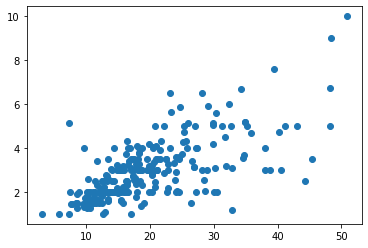

In [4]:
plt.scatter(tips["total_bill"], tips["tip"]);

With seaborn:

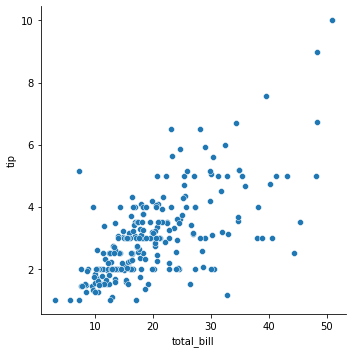

In [6]:
sns.relplot(data=tips,
            x="total_bill",
            y="tip"
);

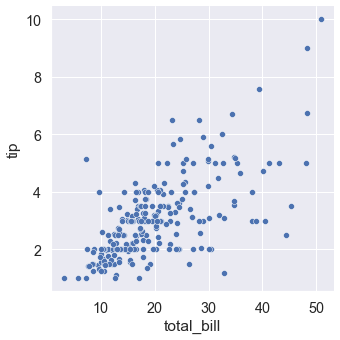

In [40]:
sns.set_theme(style="darkgrid",
              palette="deep",
              font_scale=1.3
             )

sns.relplot(data=tips,
            x="total_bill",
            y="tip"
);

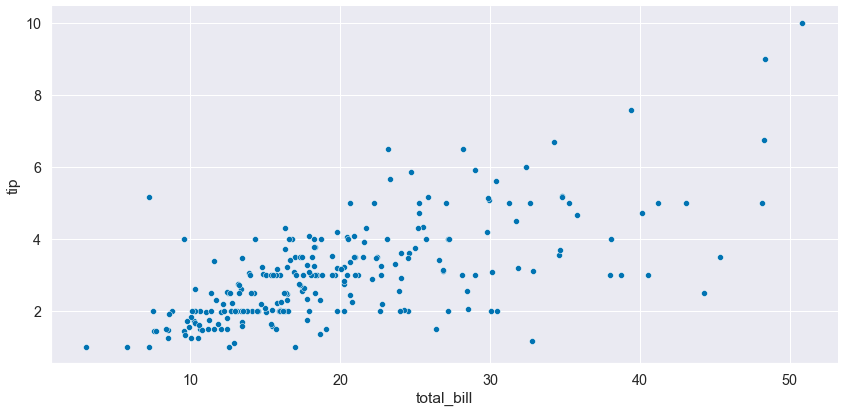

In [22]:
sns.relplot(data=tips,
            x="total_bill",
            y="tip",
            height=6,
            aspect=2
);

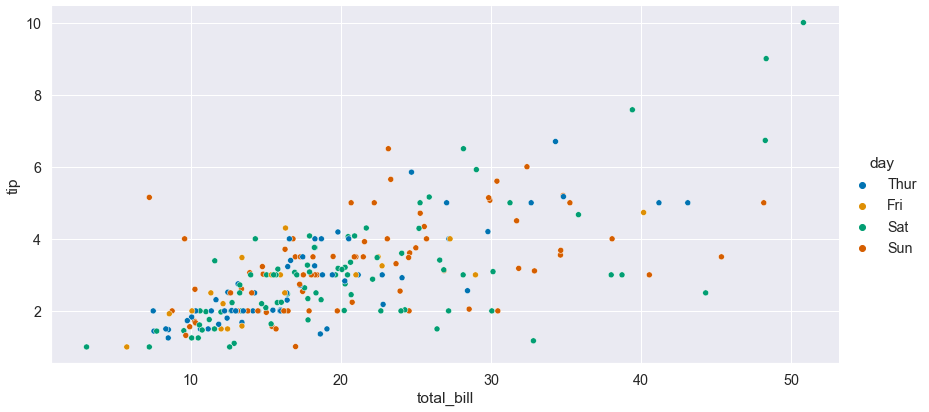

In [23]:
sns.relplot(data=tips,
            x="total_bill",
            y="tip",
            hue="day",
            height=6,
            aspect=2
);

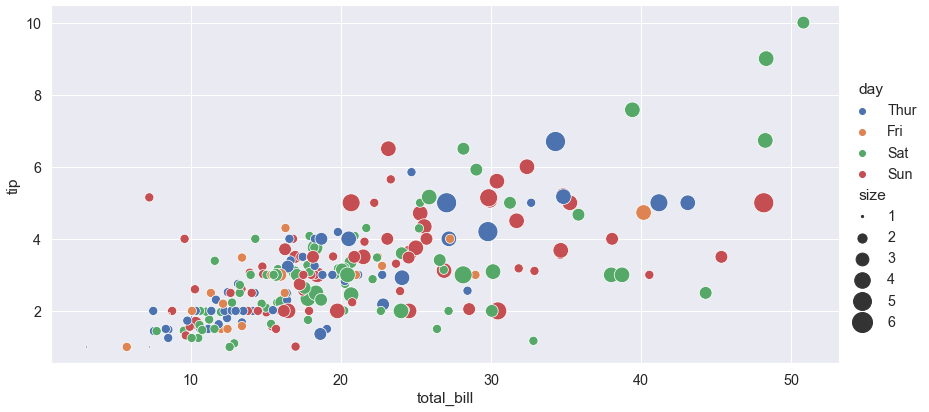

In [41]:
sns.relplot(data=tips,
            x="total_bill",
            y="tip",
            hue="day",
            size="size",
            sizes=(5, 400),
            height=6,
            aspect=2
);

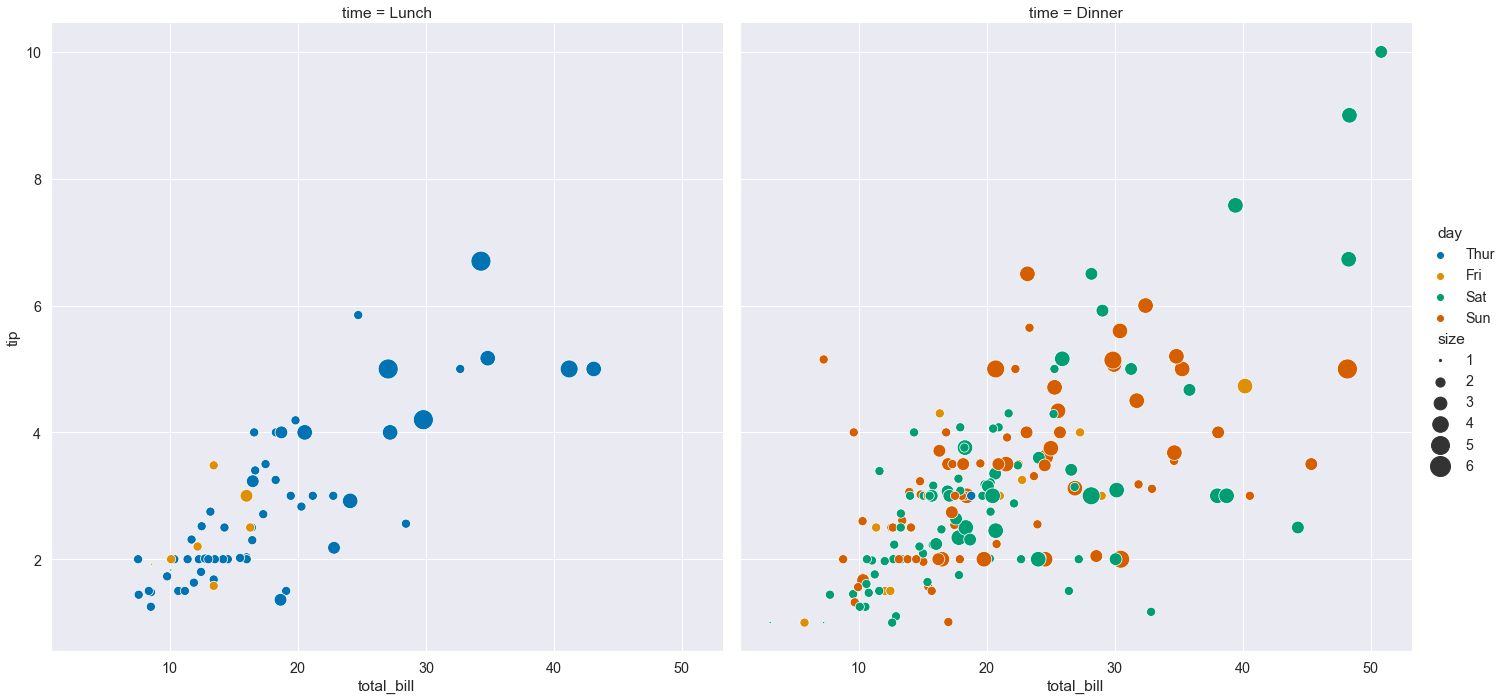

In [28]:
sns.relplot(data=tips,
            x="total_bill",
            y="tip",
            hue="day",
            size="size",
            col="time",
            sizes=(5, 400),
            height=10,
            aspect=1
);

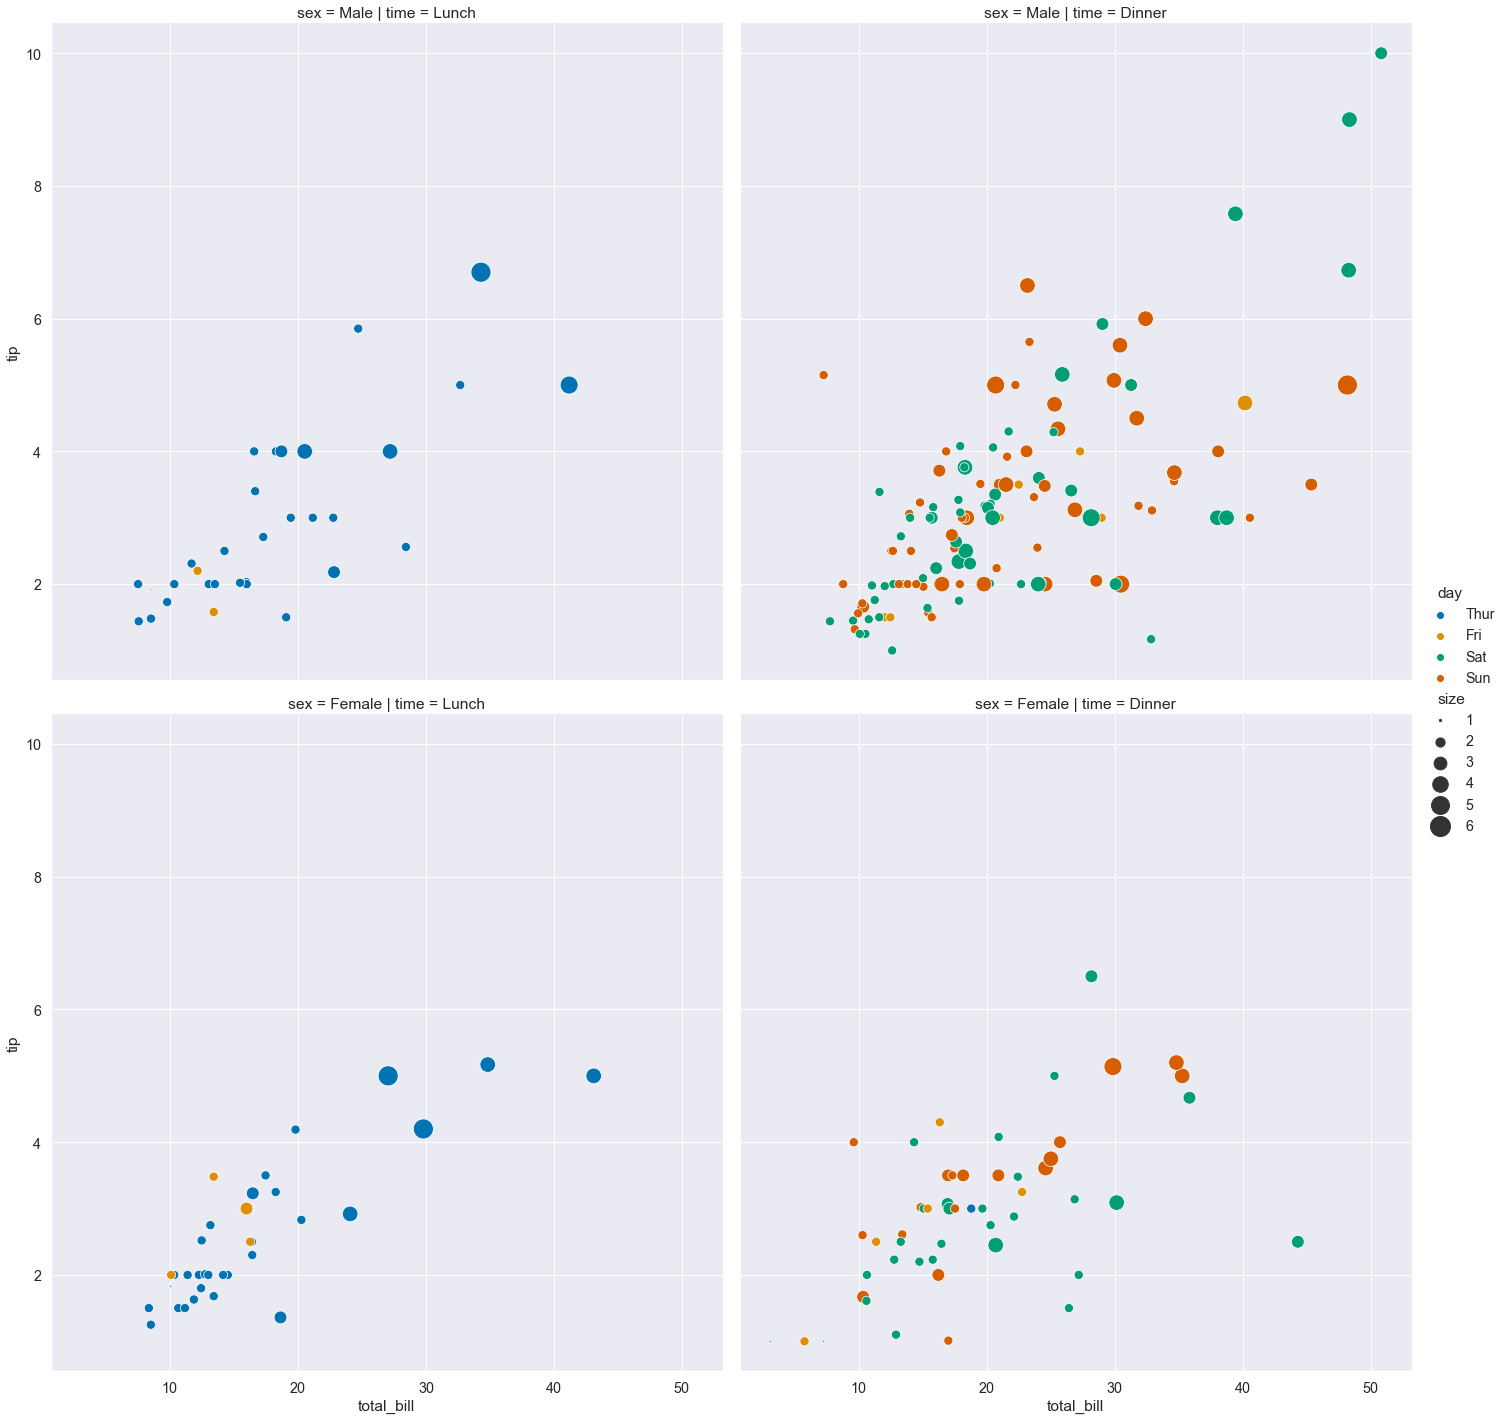

In [29]:
sns.relplot(data=tips,
            x="total_bill",
            y="tip",
            hue="day",
            size="size",
            col="time",
            row="sex",
            sizes=(5, 400),
            height=10,
            aspect=1
);

### Figure level vs axes-level functions

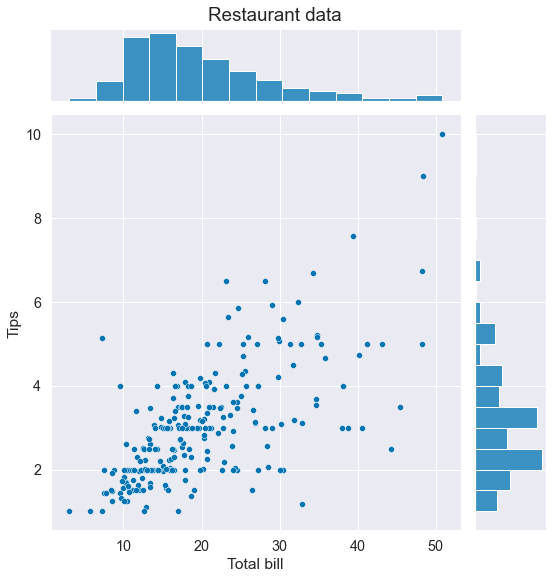

In [35]:
g = sns.jointplot(data=tips, x="total_bill", y="tip", height=8);
g.figure.suptitle("Restaurant data", y = 1.01)
g.set_axis_labels("Total bill", "Tips");

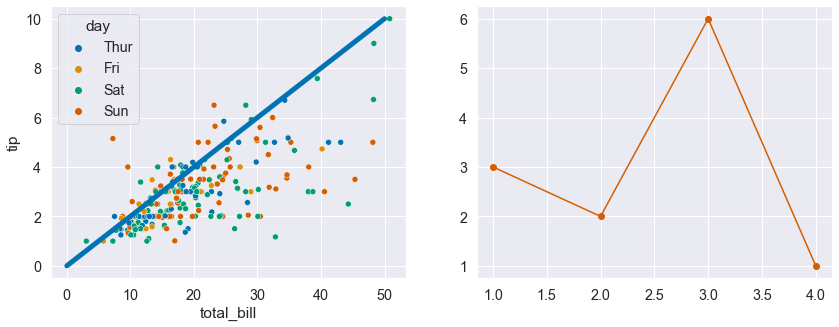

In [39]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
sns.scatterplot(data=tips,
                x="total_bill",
                y="tip",
                hue="day"
               )
plt.plot([0, 50], [0, 10], 'b-', lw=5)

plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4], [3, 2, 6, 1], 'ro-');

## Plotly Express

In [42]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook"

In [5]:
fig = px.scatter(data_frame=tips,
                     x="total_bill",
                     y="tip",
                     title="Restaurant data",
                     height=400,
                     width=800
)

fig.show()

In [49]:
fig = px.scatter(data_frame=tips,
                     x="total_bill",
                     y="tip",
                     title="Restaurant data",
                     color="day"
)

fig.show()

In [50]:
fig = px.scatter(data_frame=tips,
                 x="total_bill",
                 y="tip",
                 title="Restaurant data",
                 color="day",
                 size="size"
                )

fig.show()

In [51]:
fig = px.scatter(data_frame=tips,
                 x="total_bill",
                 y="tip",
                 title="Restaurant data",
                 color="day",
                 size="size",
                 facet_col="time"
                )

fig.show()

In [53]:
fig = px.scatter(data_frame=tips,
                 x="total_bill",
                 y="tip",
                 title="Restaurant data",
                 color="day",
                 size="size",
                 facet_col="time",
                 facet_row="sex"
                )

fig.show()

In [54]:
fig.write_html("my_great_plot.html")

## Plot types

### Line plot

In [55]:
gapminder = px.data.gapminder()
gapminder

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [57]:
ac = gapminder[gapminder["country"].str[0] == 'A' ]
ac

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
0   Afghanistan      Asia  1952   28.801   8425333    779.445314       AFG   
1   Afghanistan      Asia  1957   30.332   9240934    820.853030       AFG   
2   Afghanistan      Asia  1962   31.997  10267083    853.100710       AFG   
3   Afghanistan      Asia  1967   34.020  11537966    836.197138       AFG   
4   Afghanistan      Asia  1972   36.088  13079460    739.981106       AFG   
..          ...       ...   ...      ...       ...           ...       ...   
79      Austria    Europe  1987   74.940   7578903  23687.826070       AUT   
80      Austria    Europe  1992   76.040   7914969  27042.018680       AUT   
81      Austria    Europe  1997   77.510   8069876  29095.920660       AUT   
82      Austria    Europe  2002   78.980   8148312  32417.607690       AUT   
83      Austria    Europe  2007   79.829   8199783  36126.492700       AUT   

    iso_num  
0         4  
1         4  
2         4  
3         4  
4         4  
..      ...  
79       40  
80       40  
81       40  
82       40  
83       40  

[84 rows x 8 columns]

In [59]:
fig = px.line(ac, 
              x="year",
              y="gdpPercap",
              color="country"
)

fig.show()

### Bar plot

In [60]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [66]:
fig = px.bar(tips,
             x="day",
             y="tip",
             color="sex",
             barmode="group",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]}, 
             title="Bar plot"
            )

fig.show()

### Strip plot

In [69]:
fig = px.strip(tips, 
               x="day",
               y="tip",
               color="sex",
               title="Strip plot"

)

fig.show()

### Box plot

In [70]:
fig = px.box(tips,
             x="day",
             y="tip",
             color="sex",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]}, 
             title="Box plot"
            )

fig.show()

### Histogram

In [75]:
fig = px.histogram(tips,
                   x="total_bill",
                   nbins=6,
                   labels = {"total_bill": "total bill"},
                   title="Histogram"
)


fig.update_layout({"bargap": 0.02})
fig.show()

### 3D plot

In [78]:
fig = px.scatter_3d(tips, 
                    x="total_bill",
                    y="tip",
                    z="size",
                    color="day"
)

fig.show()